<a href="https://colab.research.google.com/github/CelesAlvarez/Australia_lluvias/blob/main/ProyectoDSParteI_AlvarezMariaCeleste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Dadas las condiciones meteorológicas de hoy, ¿Lloverá mañana en Australia?"


**AUTOR: Maria Celeste Alvarez, Comisión 77735, Data Science I**


Contexto y objetivo
Este dataset contiene datos meteorológicos históricos de Australia, con el objetivo principal de predecir si lloverá al día siguiente (RainTomorrow). Los datos incluyen mediciones diarias de:

*   Variables temporales: Fecha
*   Variables de ubicación: Localización
*   Variables meteorológicas: Temperaturas, precipitación, evaporación, horas de sol, dirección y velocidad del viento, humedad, presión atmosférica, nubosidad
*   Variables objetivo: RainToday (llovió hoy) y RainTomorrow (lloverá mañana)



Fuente: https://www.kaggle.com/datasets/sandhyapalaniappan/rainfall-prediction-dataset-cleaned-weatheraus

In [45]:
pip install yellowbrick

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np





**Revisión del dataset con:
shape,
head,
sample,
max y min,
ndim,
dtypes,
size,
Con la serie Date, max y min,
Se elije una serie aleatoria (MaxTemp) para realizar: sum, mean, min, max, np.median, np.std y np.var**




In [47]:
df = pd.read_csv('/content/weatherAUS_rainfall_prediction_dataset_cleaned.csv', delimiter=';')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2009-08-13,Moree,3.3,22.4,0.0,4.0,10.60,WSW,41.0,ENE,...,53.0,20.0,1017.3,1014.4,0.00,1.00,13.9,21.6,No,No
65531,2009-08-14,Moree,2.5,20.8,0.0,4.0,10.80,SW,31.0,N,...,54.0,23.0,1020.9,1017.8,1.00,0.00,12.7,20.7,No,No
65532,2009-08-15,Moree,1.5,22.1,0.0,4.4,10.60,WSW,26.0,ENE,...,45.0,20.0,1021.8,1018.3,0.00,0.00,13.4,21.6,No,No
65533,2009-08-16,Moree,4.2,28.0,0.0,4.6,10.80,NNE,39.0,NE,...,41.0,14.0,1020.0,1014.8,0.00,0.00,13.5,27.3,No,No


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df.shape

(65535, 23)

In [50]:
df.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [51]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
17675,2012-07-06,Ballarat,-1.0,11.70,0.2,5.47,7.61,ENE,24.0,S,...,99.0,57.00,1036.3,1033.0,0.00,4.51,1.9,11.10,No,No
27769,2015-03-16,Canberra,4.3,24.20,0.0,5.47,7.61,E,39.0,ESE,...,71.0,33.00,1017.9,1013.8,4.45,4.51,12.3,22.60,No,No
15936,2014-03-26,Ballarat,12.4,27.40,0.0,5.47,7.61,ESE,44.0,SE,...,99.0,40.00,1024.5,1021.9,4.45,4.51,14.1,24.70,No,Yes
51000,2017-03-15,Katherine,24.8,23.22,0.0,3.20,7.61,SE,30.0,WNW,...,82.0,51.54,1009.5,1005.6,0.00,4.51,28.7,21.68,No,No
57703,2012-03-06,MelbourneAirport,13.5,20.80,0.0,4.80,6.60,S,44.0,SW,...,74.0,53.00,1022.5,1022.7,7.00,6.00,14.6,19.60,No,No
23289,2011-12-20,Brisbane,19.1,29.10,0.0,7.00,12.20,NNE,26.0,NW,...,54.0,51.00,1013.2,1011.4,6.00,4.00,26.0,27.30,No,No
35952,2011-07-18,CoffsHarbour,9.2,19.20,1.0,1.20,8.00,SE,19.0,WNW,...,88.0,68.00,1018.6,1015.1,1.00,5.00,14.2,18.20,No,No
21381,2013-06-06,Bendigo,10.0,14.90,0.0,0.80,7.61,NW,30.0,NNE,...,93.0,91.00,1018.8,1016.5,8.00,8.00,10.5,12.20,No,Yes
23905,2017-06-12,Brisbane,13.9,22.40,14.6,0.80,7.40,SW,24.0,WSW,...,83.0,63.00,1021.0,1017.1,4.00,5.00,17.8,22.00,Yes,Yes
50222,2013-07-10,Katherine,17.4,32.50,0.0,7.80,7.61,E,48.0,SE,...,73.0,56.00,1015.5,1011.5,0.00,1.00,22.8,30.50,No,No


In [52]:
df.max()

,0
Date,2017-06-25
Location,Moree
MinTemp,33.9
MaxTemp,47.3
Rainfall,371.0
Evaporation,86.2
Sunshine,14.5
WindGustDir,WSW
WindGustSpeed,130.0
WindDir9am,WSW


In [53]:
df.ndim

2

In [54]:
columnas=list(df.columns)
columnas

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [55]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [56]:
df.size


1507305

65535 filas por 23 columnas //
tabla de 2 dimensiones.  //
total de arrays 1507305.


In [57]:
df['Date'].max()

'2017-06-25'

In [58]:
df['Date'].min()

'2007-11-01'

In [59]:
df['Temp9am'].min()

-2.3

In [60]:
df['Temp9am'].max()

39.1

In [61]:
df['Temp9am'].mean()

np.float64(17.34000732433051)

In [62]:
print("Suma = ", df['MaxTemp'].sum())
print("Media o promedio = ", df['MaxTemp'].mean())
print("Mínimo = ", df['MaxTemp'].min())
print("Máximo = ", df['MaxTemp'].max())
print("Mediana = ", np.median(df['MaxTemp']))
print("Desviación estándar = ", np.std(df['MaxTemp']))
print("Varianza = ", np.var(df['MaxTemp']))

Suma =  1556508.56
Media o promedio =  23.750798199435415
Mínimo =  4.1
Máximo =  47.3
Mediana =  23.22
Desviación estándar =  7.303333060446278
Varianza =  53.33867379180759


Cambiar DATE a un formato date y RainToday + RainTomorrow a un formato booleano.
Se crea una nueva serie "Date_modified"

In [63]:
df['Date_modified']=pd.to_datetime(df['Date'])
df['Date_modified']
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_modified
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No,2010-04-30
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No,2014-07-22
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes,2014-07-23
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes,2014-07-24
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes,2014-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2009-08-13,Moree,3.3,22.4,0.0,4.0,10.60,WSW,41.0,ENE,...,20.0,1017.3,1014.4,0.00,1.00,13.9,21.6,No,No,2009-08-13
65531,2009-08-14,Moree,2.5,20.8,0.0,4.0,10.80,SW,31.0,N,...,23.0,1020.9,1017.8,1.00,0.00,12.7,20.7,No,No,2009-08-14
65532,2009-08-15,Moree,1.5,22.1,0.0,4.4,10.60,WSW,26.0,ENE,...,20.0,1021.8,1018.3,0.00,0.00,13.4,21.6,No,No,2009-08-15
65533,2009-08-16,Moree,4.2,28.0,0.0,4.6,10.80,NNE,39.0,NE,...,14.0,1020.0,1014.8,0.00,0.00,13.5,27.3,No,No,2009-08-16


In [64]:
df['Date_modified'].min()

Timestamp('2007-11-01 00:00:00')

In [65]:
fecha_inicio = df['Date_modified'].min()
fecha_fin = df['Date_modified'].max()
print("Fecha de inicio:", fecha_inicio)
print("Fecha de fin:", fecha_fin)

Fecha de inicio: 2007-11-01 00:00:00
Fecha de fin: 2017-06-25 00:00:00


Se crea la serie "Semana"

In [66]:
df['Semana']=(df['Date_modified']-fecha_inicio).dt.days//7 +1
df['Semana']


,Semana
0,131
1,351
2,351
3,352
4,352
...,...
65530,94
65531,94
65532,94
65533,94


In [67]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_modified,Semana
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No,2010-04-30,131
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No,2014-07-22,351
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes,2014-07-23,351
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes,2014-07-24,352
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes,2014-07-25,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2009-08-13,Moree,3.3,22.4,0.0,4.0,10.60,WSW,41.0,ENE,...,1017.3,1014.4,0.00,1.00,13.9,21.6,No,No,2009-08-13,94
65531,2009-08-14,Moree,2.5,20.8,0.0,4.0,10.80,SW,31.0,N,...,1020.9,1017.8,1.00,0.00,12.7,20.7,No,No,2009-08-14,94
65532,2009-08-15,Moree,1.5,22.1,0.0,4.4,10.60,WSW,26.0,ENE,...,1021.8,1018.3,0.00,0.00,13.4,21.6,No,No,2009-08-15,94
65533,2009-08-16,Moree,4.2,28.0,0.0,4.6,10.80,NNE,39.0,NE,...,1020.0,1014.8,0.00,0.00,13.5,27.3,No,No,2009-08-16,94


In [68]:
df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
df['RainToday'].value_counts()

,count
RainToday,
No,51444
Yes,14091


In [70]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,51445
Yes,14090


In [72]:
df['Rain_Today_Bool'] = df['RainToday'] == 'Yes'
df.loc[:,['RainToday','Rain_Today_Bool']]

,RainToday,Rain_Today_Bool
0,No,False
1,No,False
2,No,False
3,Yes,True
4,Yes,True
...,...,...
65530,No,False
65531,No,False
65532,No,False
65533,No,False


**Hipotesis iniciales para probar en EDA**

1. Mayor humedad, presión más baja y vientos específicos incrementan probabilidad de lluvia mañana.


2. Precipitación acumulada en últimos 3-7 días aumenta probabilidad de lluvia mañana.


3. Estaciones/locations muestran patrones diferentes. Modelar por estación o incluir efecto fijo de estación mejora performance.


4. Estacionalidad (mes, estación del año) es relevante.


5. Variables a la mañana (9am) son fuertes predicciones de RainTomorrow.


6. Clase minoritaria: días de RainTomorrow=yes son menos frecuentes. Necesario balanceo o ajuste de umbral.


**Visualizaciones**
Univariadas, bivariadas o multivariadas

1. Grafico Boxplot para ver los valores outliers de precipitaciones
2. grafico de barras apiladas/lineas precipitaciones por ciudad por meses. hipotesis 2
3. Grafico que cruce humedad y presion, con RainTomorrow. hipotesis 1




In [73]:
valores_unicos = df['WindDir9am'].unique()

print(f"Columna: WindDir9am")
print(f"Total de valores únicos: {len(valores_unicos)}")
print(f"Valores únicos: {valores_unicos}")
print(f"Tipo de datos: {df['WindDir9am'].dtype}")

Columna: WindDir9am
Total de valores únicos: 16
Valores únicos: ['ENE' 'N' 'NNE' 'NW' 'WNW' 'NNW' 'NE' 'SW' 'SE' 'WSW' 'SSW' 'S' 'ESE' 'E'
 'W' 'SSE']
Tipo de datos: object


In [74]:
valores_unicos_localidad = df['Location'].unique()

print(f"Columna: Location")
print(f"Total de valores únicos: {len(valores_unicos_localidad)}")
print(f"Valores únicos: {valores_unicos_localidad}")
print(f"Tipo de datos: {df['Location'].dtype}")

Columna: Location
Total de valores únicos: 22
Valores únicos: ['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree']
Tipo de datos: object


In [75]:
# Crear diccionario de mapeo
locations_unicas = df['Location'].unique()
mapeo_location = {location: codigo + 1 for codigo, location in enumerate(locations_unicas)}

# Aplicar el mapeo
df['Location_Code'] = df['Location'].map(mapeo_location)

print("Diccionario de mapeo:")
for location, codigo in mapeo_location.items():
    print(f"{codigo}: {location}")

Diccionario de mapeo:
1: Adelaide
2: Albany
3: Albury
4: AliceSprings
5: BadgerysCreek
6: Ballarat
7: Bendigo
8: Brisbane
9: Cairns
10: Canberra
11: Cobar
12: CoffsHarbour
13: Dartmoor
14: Darwin
15: GoldCoast
16: Hobart
17: Katherine
18: Launceston
19: Melbourne
20: MelbourneAirport
21: Mildura
22: Moree


In [76]:
df.sample(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_modified,Semana,Rain_Today_Bool,Location_Code
34360,2013-10-20,CoffsHarbour,15.1,25.3,2.4,4.60,7.61,NNE,52.00,ESE,...,2.00,2.00,21.6,22.5,Yes,No,2013-10-20,312,True,12
58207,2013-09-07,MelbourneAirport,7.1,18.4,0.0,2.20,5.80,SW,46.00,WNW,...,7.00,7.00,11.7,13.7,No,No,2013-09-07,306,False,20
38767,2014-06-10,Dartmoor,3.3,16.1,0.2,0.60,2.80,N,30.00,NE,...,4.45,4.51,6.3,15.4,No,No,2014-06-10,345,False,13
35139,2014-09-22,CoffsHarbour,10.8,19.9,3.6,5.47,7.61,W,40.04,N,...,4.45,4.51,16.9,18.8,Yes,No,2014-09-22,360,True,12
14061,2011-01-08,BadgerysCreek,19.1,29.0,9.0,5.47,7.61,S,43.00,N,...,4.45,4.51,21.6,26.8,Yes,Yes,2011-01-08,167,True,5
42192,2011-01-10,Darwin,24.6,29.6,13.8,6.40,0.20,W,67.00,W,...,8.00,8.00,27.3,28.3,Yes,Yes,2011-01-10,167,True,14
44571,2016-04-26,GoldCoast,19.0,25.8,4.4,5.47,7.61,SE,61.00,SE,...,4.45,4.51,24.3,23.6,Yes,No,2016-04-26,443,True,15
8328,2014-10-07,Albury,11.7,18.6,9.6,5.47,7.61,W,65.00,W,...,8.00,8.00,13.9,17.3,Yes,No,2014-10-07,362,True,3
2853,2011-03-10,Adelaide,14.9,21.6,0.0,4.20,7.10,SE,35.00,SSE,...,4.45,4.51,17.1,19.8,No,No,2011-03-10,176,False,1
5094,2009-03-29,Albany,16.0,19.0,0.4,4.80,1.80,W,40.04,ESE,...,8.00,8.00,17.0,17.0,No,No,2009-03-29,74,False,2


1. Grafico Boxplot para ver los valores outliers de precipitaciones. En el primer grafico se ven las presipitaciones totales, mientras en el segundo (desde una pivot table) vemos valores outliers especialmente altos en dos localidades, CoffsHarbour y Darwin.

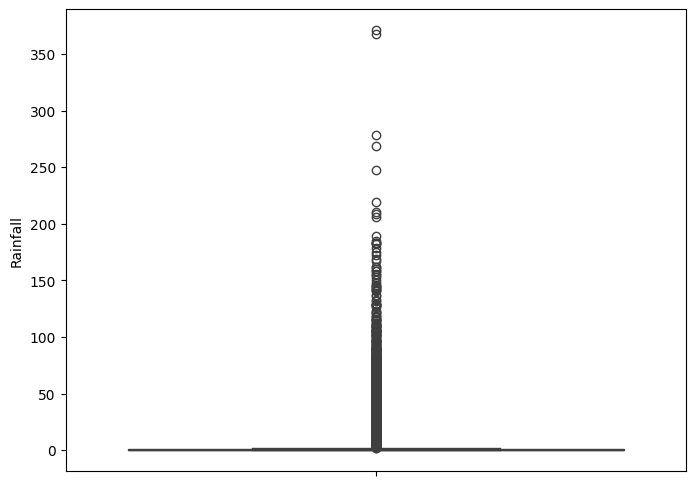

In [77]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(df.Rainfall)

In [78]:
Tabla_Rainfall = pd.pivot_table(df,index='Date', columns='Location', values='Rainfall', aggfunc='sum').reset_index()
Tabla_Rainfall

Location,Date,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,...,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree
0,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,2017-06-21,0.0,2.36,0.4,0.0,0.2,0.4,0.0,0.0,0.4,...,0.8,0.0,0.0,2.6,0.00,3.0,0.6,0.2,0.0,0.0
3432,2017-06-22,0.0,20.20,0.0,0.0,0.0,0.2,0.2,0.0,0.2,...,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.0,0.0,0.0
3433,2017-06-23,0.0,6.20,0.0,0.0,0.2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,5.4,0.0,0.0,0.0,0.0
3434,2017-06-24,0.0,1.20,0.2,0.0,0.0,1.4,0.0,0.0,1.2,...,3.0,0.0,0.0,2.2,0.00,8.6,1.4,1.2,0.0,0.0


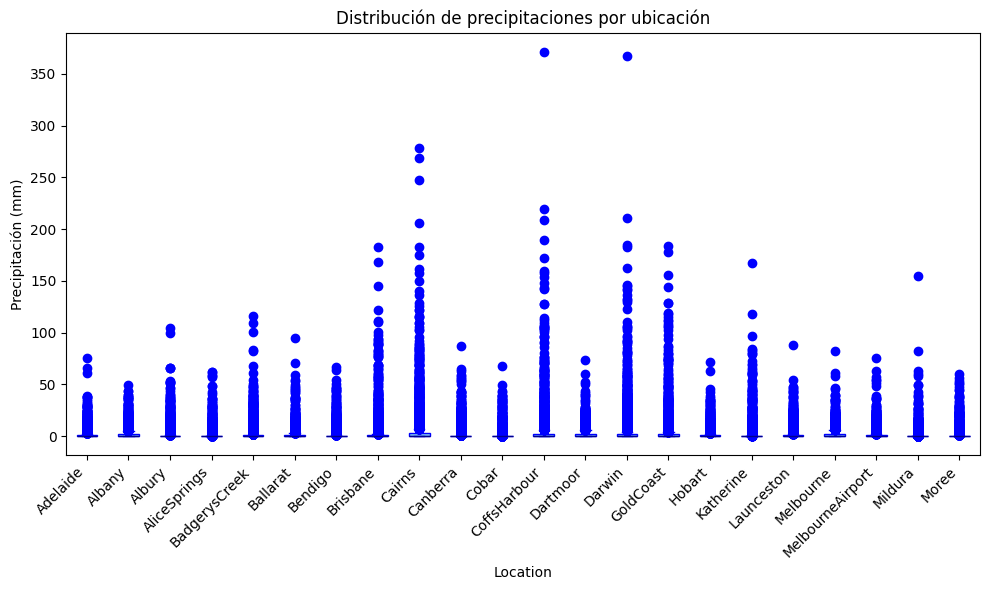

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))

data = [Tabla_Rainfall[col].dropna() for col in Tabla_Rainfall.columns if col != 'Date']

# Boxplot azul
ax.boxplot(
    data,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='darkblue'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    flierprops=dict(markerfacecolor='blue', markeredgecolor='blue'))

ax.set_xticklabels([col for col in Tabla_Rainfall.columns if col != 'Date'], rotation=45, ha='right')
ax.set_title('Distribución de precipitaciones por ubicación')
ax.set_xlabel('Location')
ax.set_ylabel('Precipitación (mm)')

plt.tight_layout()
plt.show()

2. Grafico de dispersión precipitaciones por ciudad por meses. este grafico muestra que los meses con mayores precipitaciones son Enero, Febrero y Marzo.

In [80]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Crear columna con el número de mes
df['Month'] = df['Date'].dt.month

# Crear tabla dinámica: suma de precipitaciones por ciudad y por mes
pivot_rainfall = pd.pivot_table(df, index='Month',  columns='Location', values='Rainfall', aggfunc='sum')
pivot_rainfall.sample(5)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree
Month,,,,,,,,,,,,,,,,,,,,,
12,305.08,286.40,325.76,456.08,494.24,289.6,314.40,1128.80,1370.84,787.16,...,316.20,2638.6,1227.52,379.0,1192.62,381.72,531.36,381.6,290.60,351.40
8,668.72,936.30,553.36,48.80,338.68,553.6,504.00,356.36,177.80,380.56,...,869.76,2.8,498.88,548.8,0.00,805.30,521.40,285.6,148.56,156.96
5,621.40,714.12,451.68,142.76,409.08,393.8,371.64,806.96,844.20,257.16,...,753.60,235.4,904.80,449.4,52.80,613.90,466.88,275.6,202.40,270.16
6,588.76,1031.98,523.36,46.00,800.92,462.6,464.60,678.56,464.20,485.08,...,784.20,1.0,1053.40,488.4,2.46,667.74,557.32,417.0,163.00,247.12
4,343.64,491.04,480.20,169.52,660.16,365.6,373.80,671.28,1419.52,337.86,...,444.00,801.6,1507.52,210.0,171.00,394.00,532.92,346.4,248.40,200.88


**Aqui se prueban dos posibles visualizaciones distintas para el mismo cruce.** El grafico de lineas muestra mejor los lugaren donde llovio más en diembre, enero y febrero (Darwin y Brisbane) y en mayo, junio (Coffs Harbour).

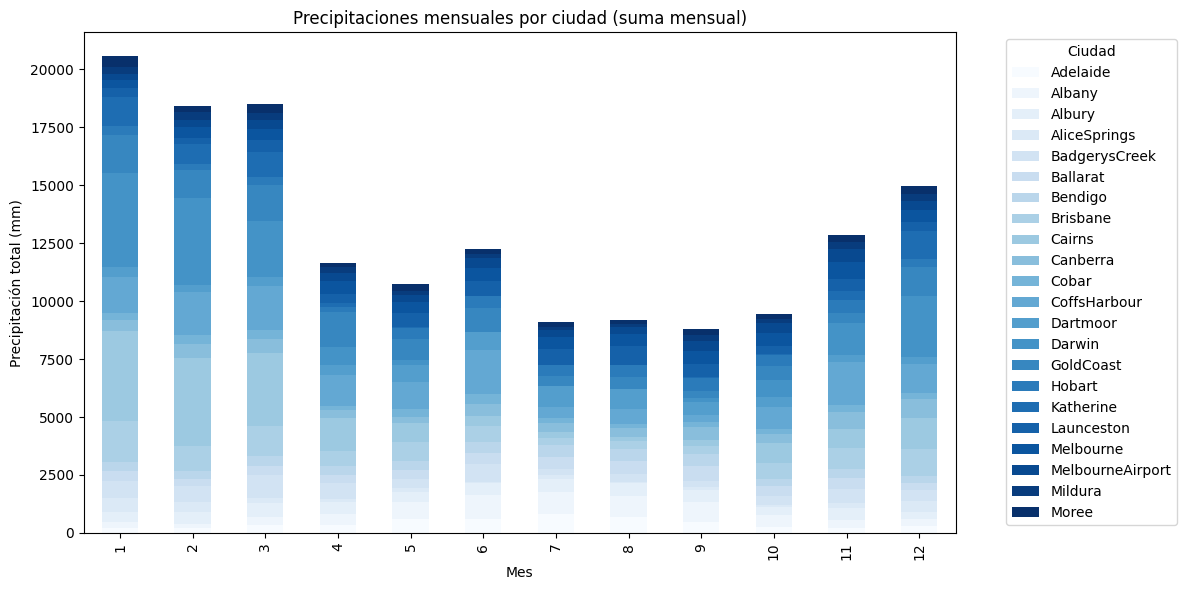

In [81]:
pivot_rainfall.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Blues'
)

plt.title('Precipitaciones mensuales por ciudad (suma mensual)')
plt.xlabel('Mes')
plt.ylabel('Precipitación total (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ciudad')
plt.tight_layout()
plt.show()

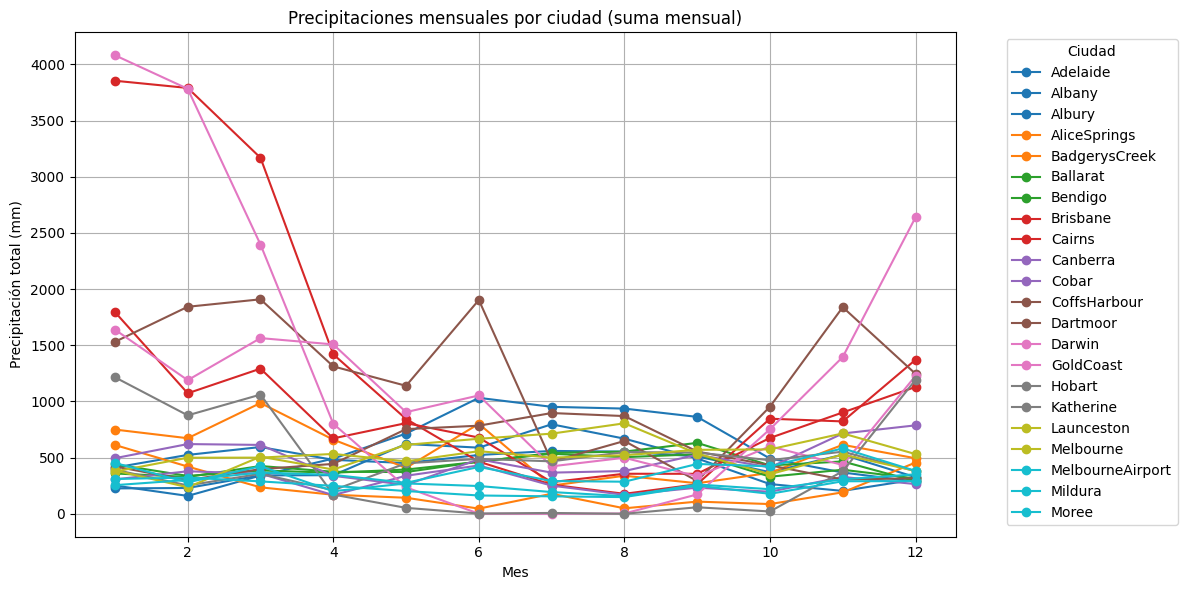

In [82]:
pivot_rainfall.plot(
    kind='line',
    figsize=(12, 6),
    colormap='tab10',  # puedes probar 'Set1', 'Dark2', etc.
    marker='o'         # agrega puntos en las líneas
)

plt.title('Precipitaciones mensuales por ciudad (suma mensual)')
plt.xlabel('Mes')
plt.ylabel('Precipitación total (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ciudad')
plt.grid(True)
plt.tight_layout()
plt.show()

3. **Grafico que cruce humedad y presion, con RainTomorrow.**
Los días en que llueve al día siguiente suelen presentar mayor humedad relativa a las 9 am. La separación entre ambas distribuciones respalda la hipótesis de que la humedad es un predictor útil de lluvia.
En el caso de la presión es al revés, presiones más bajas se asocian con mayor probabilidad de lluvia.

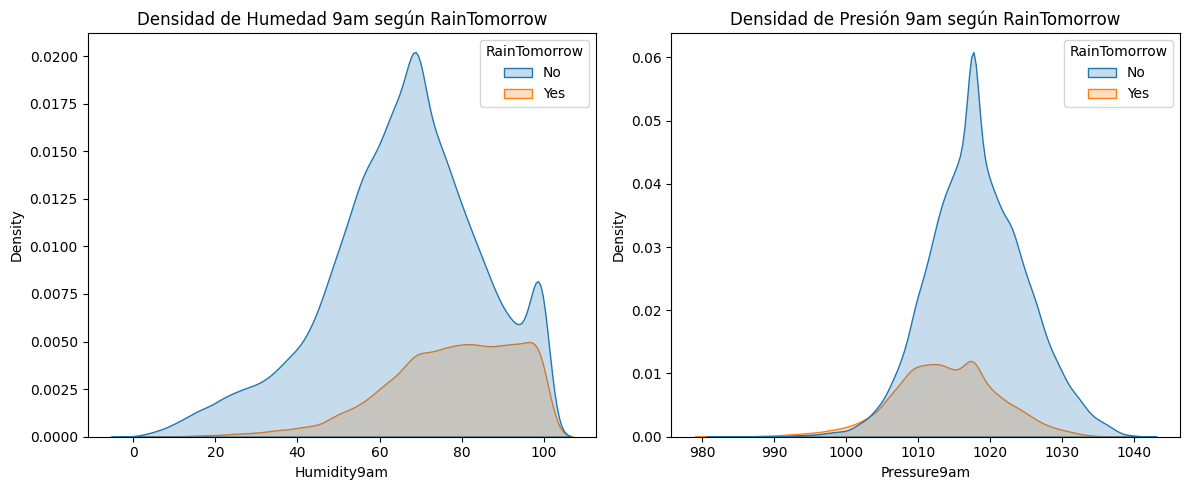

In [83]:

plt.figure(figsize=(12, 5))

# Humedad
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Humidity9am', hue='RainTomorrow', fill=True)
plt.title('Densidad de Humedad 9am según RainTomorrow')

# Presión
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Pressure9am', hue='RainTomorrow', fill=True)
plt.title('Densidad de Presión 9am según RainTomorrow')

plt.tight_layout()
plt.show()

Identificacion de valores perdidos.

In [84]:
missing_values = df.isnull().sum()

# Porcentaje
missing_percent = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    'Valores perdidos': missing_values,
    '% del total': missing_percent
}).sort_values(by='Valores perdidos', ascending=False)
print(missing_summary)

                 Valores perdidos  % del total
Date                            0          0.0
Location                        0          0.0
MinTemp                         0          0.0
MaxTemp                         0          0.0
Rainfall                        0          0.0
Evaporation                     0          0.0
Sunshine                        0          0.0
WindGustDir                     0          0.0
WindGustSpeed                   0          0.0
WindDir9am                      0          0.0
WindDir3pm                      0          0.0
WindSpeed9am                    0          0.0
WindSpeed3pm                    0          0.0
Humidity9am                     0          0.0
Humidity3pm                     0          0.0
Pressure9am                     0          0.0
Pressure3pm                     0          0.0
Cloud9am                        0          0.0
Cloud3pm                        0          0.0
Temp9am                         0          0.0
Temp3pm      

In [85]:
Tabla1 = pd.pivot_table(df, index='Semana', columns='Location', values='Temp9am', aggfunc='mean')
Tabla1

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree
Semana,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.371429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.471429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.171429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.257143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,12.428571,12.585714,8.400000,15.271429,11.171429,6.842857,9.042857,18.100000,24.600000,6.185714,...,8.485714,26.228571,19.257143,9.200000,22.312857,6.471429,11.657143,10.757143,9.757143,12.800000
501,9.342857,13.927143,4.728571,8.171429,11.271429,5.800000,6.957143,16.128571,22.128571,4.285714,...,4.785714,24.414286,17.228571,9.228571,22.357143,5.271429,9.485714,8.542857,4.914286,10.057143
502,10.285714,11.998571,5.842857,7.828571,12.914286,6.028571,6.357143,17.228571,21.200000,6.385714,...,8.757143,21.742857,18.314286,8.928571,18.128571,6.142857,8.528571,8.842857,6.171429,13.228571


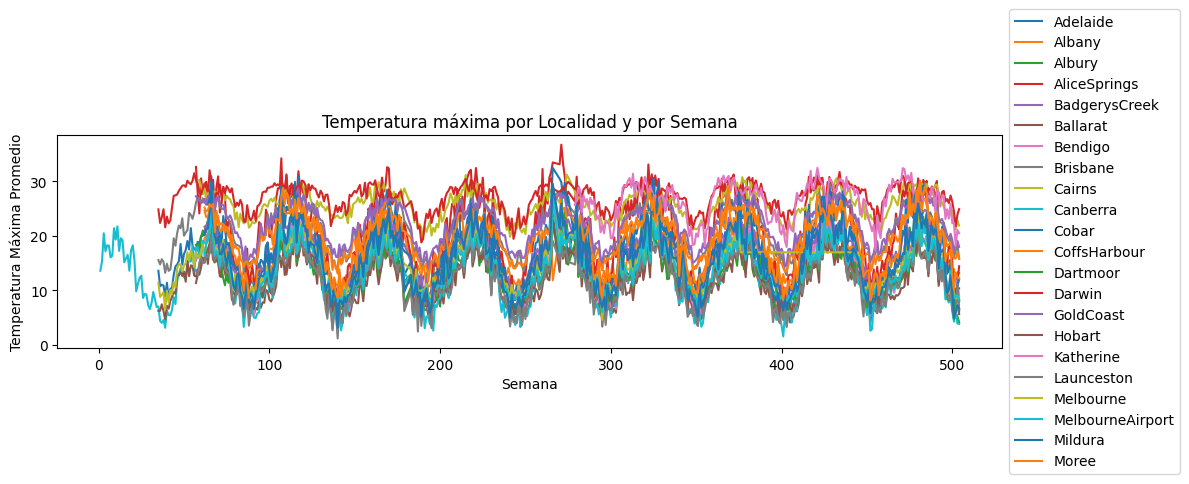

In [86]:
indice = Tabla1.index
values = Tabla1
labels = Tabla1.columns
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(indice, values, label=labels)

ax.set_xlabel('Semana')
ax.set_ylabel('Temperatura Máxima Promedio')
ax.set_title('Temperatura máxima por Localidad y por Semana')
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
